In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import pyodbc 
import os 
from tqdm import tqdm 
import sys
import time

In [2]:
# Establish connection to SQL Server
conn = pyodbc.connect('Driver={SQL Server};'
                       'Server=esmz08srdb029.imptobnet.com;'
                       'Database=ITE_PRD;'
                       'Trusted_Connection=yes;')

In [2]:
OUTPUT = '../02_Data/01_TT_Sales_and_Invest_10d_by_brand.csv'

In [4]:
t1 = time.time()

In [5]:
# Open SQL query file 
sql = open('../01_TT_Sales_and_Invest_10d_by_brand.sql', 'r').read()
cursor = conn.cursor()

In [6]:
# Generate chunks for batch reading avoiding out of memory
chunksize = 200000
generator = pd.read_sql(sql,conn, chunksize=chunksize)
     
begin = True
for chunk in tqdm(generator):
    if begin:
        chunk.to_csv(OUTPUT, sep='|', index=False, mode='w')
        begin = False
    else:
        chunk.to_csv(OUTPUT, sep='|', index=False, mode='a', header=False)

t2 = time.time()
#print ("Time to execute script:",str(t2-t1))

29it [59:02, 122.16s/it]


Time to execute script: 3547.8088099956512


In [7]:
print ("Time to execute script:",str(round((t2-t1)/3600,2)), "h")

Time to execute script: 0.99 h


In [3]:
dataset = pd.read_csv(OUTPUT,sep='|') 


# Exploratory data analysis

In [4]:
dataset.columns

Index(['CUSTOMER_ID', 'BRANDFAMILY_ID', 'R', 'tercio', 'NUM_SELLING_DAYS',
       'NUM_DAYS', 'days_btw_order', 'num_orders', 'CAL_DATE', 'CAL_DATE_end',
       'SI_ITG_WSE', 'SI_MRKT_WSE', 'SO_ITG_WSE', 'SO_MRKT_WSE',
       'QUOTA_SELLIN', 'QUOTA_SELLOUT', 'MECHERO', 'CLIPPER', 'ABP',
       'DISPENSADOR', 'VISIBILIDAD', 'AZAFATA', 'TOTEM', 'SVM', 'TFT', 'CUE',
       'VISIT', 'PERC_MECHERO', 'PERC_CLIPPER', 'PERC_ABP', 'PERC_DISPENSADOR',
       'PERC_VISIBILIDAD', 'PERC_AZAFATA', 'PERC_TOTEM', 'PERC_SVM',
       'PERC_TFT', 'PERC_CUE', 'PERC_visit'],
      dtype='object')

In [5]:
pd.options.display.width = 0
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Checking the types of data

In [6]:
dataset.head()

,CUSTOMER_ID,BRANDFAMILY_ID,R,tercio,NUM_SELLING_DAYS,NUM_DAYS,days_btw_order,num_orders,CAL_DATE,CAL_DATE_end,SI_ITG_WSE,SI_MRKT_WSE,SO_ITG_WSE,SO_MRKT_WSE,QUOTA_SELLIN,QUOTA_SELLOUT,MECHERO,CLIPPER,ABP,DISPENSADOR,VISIBILIDAD,AZAFATA,TOTEM,SVM,TFT,CUE,VISIT,PERC_MECHERO,PERC_CLIPPER,PERC_ABP,PERC_DISPENSADOR,PERC_VISIBILIDAD,PERC_AZAFATA,PERC_TOTEM,PERC_SVM,PERC_TFT,PERC_CUE,PERC_visit
0,46000212,BF241151,116,3,7,9,7.0,2.0,2021-06-22,2021-06-30,1315.0,156866.0,1920.0,144085.0,0.008383,0.013325,0,3,0,0,0,0,0,0,0,0,1,0.000000,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.111111
1,46002945,BF231021,89,2,8,12,7.0,6.0,2019-10-11,2019-10-22,40040.0,178942.0,22490.0,179765.0,0.223760,0.125107,0,0,0,0,0,0,2,0,0,12,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.166666,0.0,0.0,1.0,0.083333
2,43020684,BF241049,99,3,7,9,21.0,1.0,2020-01-23,2020-01-31,1134.0,13515.0,879.0,12292.0,0.083907,0.071512,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,46000212,BF234103,96,2,6,8,7.0,2.0,2019-12-12,2019-12-19,10728.0,201712.0,10400.0,171958.0,0.053185,0.060479,3,0,0,0,0,0,0,0,0,0,1,0.375000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.125000
4,28000123,BF234103,83,1,7,11,7.0,1.0,2019-08-01,2019-08-11,6389.0,182067.0,6980.0,173075.0,0.035091,0.040329,5,0,0,0,0,0,0,0,0,0,0,0.454545,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744037 entries, 0 to 5744036
Data columns (total 38 columns):
CUSTOMER_ID         int64
BRANDFAMILY_ID      object
R                   int64
tercio              int64
NUM_SELLING_DAYS    int64
NUM_DAYS            int64
days_btw_order      float64
num_orders          float64
CAL_DATE            object
CAL_DATE_end        object
SI_ITG_WSE          float64
SI_MRKT_WSE         float64
SO_ITG_WSE          float64
SO_MRKT_WSE         float64
QUOTA_SELLIN        float64
QUOTA_SELLOUT       float64
MECHERO             int64
CLIPPER             int64
ABP                 int64
DISPENSADOR         int64
VISIBILIDAD         int64
AZAFATA             int64
TOTEM               int64
SVM                 int64
TFT                 int64
CUE                 int64
VISIT               int64
PERC_MECHERO        float64
PERC_CLIPPER        float64
PERC_ABP            float64
PERC_DISPENSADOR    float64
PERC_VISIBILIDAD    float64
PERC_AZAFATA        float6

### Edit & Drop columns 

In [8]:
dataset.CUSTOMER_ID = dataset.CUSTOMER_ID.astype(str)
dataset.R = dataset.R.astype(str)

In [9]:
dataset = dataset.drop(['R'], axis=1)

### Data Shape & Description

In [10]:
dataset.shape

(5744037, 37)

In [11]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dataset.describe()

,tercio,NUM_SELLING_DAYS,NUM_DAYS,days_btw_order,num_orders,SI_ITG_WSE,SI_MRKT_WSE,SO_ITG_WSE,SO_MRKT_WSE,QUOTA_SELLIN,QUOTA_SELLOUT,MECHERO,CLIPPER,ABP,DISPENSADOR,VISIBILIDAD,AZAFATA,TOTEM,SVM,TFT,CUE,VISIT,PERC_MECHERO,PERC_CLIPPER,PERC_ABP,PERC_DISPENSADOR,PERC_VISIBILIDAD,PERC_AZAFATA,PERC_TOTEM,PERC_SVM,PERC_TFT,PERC_CUE,PERC_visit
count,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00,5744037.00
mean,2.00,6.88,10.15,11.64,1.29,8021.26,111769.34,6808.67,105177.82,0.07,0.07,1.07,1.01,0.41,0.12,0.37,0.04,0.12,1.38,2.37,0.06,0.43,0.11,0.10,0.04,0.01,0.04,0.00,0.01,0.14,0.23,0.01,0.04
std,0.82,0.62,1.40,22.65,0.98,16451.06,108445.92,13701.29,105193.53,0.10,0.09,2.87,2.78,1.98,0.88,2.61,0.24,1.34,5.91,8.20,0.78,0.61,0.29,0.28,0.20,0.09,0.27,0.02,0.14,0.58,0.80,0.08,0.06
min,1.00,5.00,7.00,0.00,0.00,0.00,0.00,-22138.00,-68087.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,7.00,9.00,7.00,1.00,986.00,50109.00,920.00,46113.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,7.00,10.00,7.00,1.00,2867.00,90046.00,2536.00,84110.00,0.03,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3.00,7.00,11.00,8.00,2.00,7750.00,146088.00,6700.00,137460.00,0.08,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09
max,3.00,8.00,13.00,1198.00,9.00,2895928.00,10289579.00,2327821.00,11223122.00,1.00,1.00,187.00,73.00,285.00,64.00,215.00,24.00,81.00,104.00,208.00,13.00,7.00,18.70,6.64,25.91,6.00,21.50,2.40,9.00,8.40,16.00,1.00,0.67


### Duplicate, missing

In [12]:
dataset.shape
# Rows containing duplicate data
duplicate_rows_df = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 37)


In [13]:
# Finding the null values.
print(dataset.isnull().sum())

CUSTOMER_ID         0
BRANDFAMILY_ID      0
tercio              0
NUM_SELLING_DAYS    0
NUM_DAYS            0
days_btw_order      0
num_orders          0
CAL_DATE            0
CAL_DATE_end        0
SI_ITG_WSE          0
SI_MRKT_WSE         0
SO_ITG_WSE          0
SO_MRKT_WSE         0
QUOTA_SELLIN        0
QUOTA_SELLOUT       0
MECHERO             0
CLIPPER             0
ABP                 0
DISPENSADOR         0
VISIBILIDAD         0
AZAFATA             0
TOTEM               0
SVM                 0
TFT                 0
CUE                 0
VISIT               0
PERC_MECHERO        0
PERC_CLIPPER        0
PERC_ABP            0
PERC_DISPENSADOR    0
PERC_VISIBILIDAD    0
PERC_AZAFATA        0
PERC_TOTEM          0
PERC_SVM            0
PERC_TFT            0
PERC_CUE            0
PERC_visit          0
dtype: int64


### Dependent Variables

In [14]:
feats_to_explore=['tercio', 'NUM_SELLING_DAYS', 'NUM_DAYS', 'days_btw_order', 'num_orders', 'SI_ITG_WSE', 'SI_MRKT_WSE','QUOTA_SELLIN', 'MECHERO', 'CLIPPER', 'ABP', 'DISPENSADOR', 'VISIBILIDAD', 'AZAFATA', 'TOTEM', 'SVM', 'TFT', 'CUE', 'VISIT', 'PERC_MECHERO', 'PERC_CLIPPER', 'PERC_ABP', 'PERC_DISPENSADOR', 'PERC_VISIBILIDAD', 'PERC_AZAFATA', 'PERC_TOTEM', 'PERC_SVM', 'PERC_TFT', 'PERC_CUE', 'PERC_visit']
cat_Feat=['CUSTOMER_ID', 'BRANDFAMILY_ID', 'CAL_DATE', 'CAL_DATE_end', 'SO_ITG_WSE', 'SO_MRKT_WSE', 'QUOTA_SELLOUT']

In [15]:
corr = dataset.corr()
corr

,tercio,NUM_SELLING_DAYS,NUM_DAYS,days_btw_order,num_orders,SI_ITG_WSE,SI_MRKT_WSE,SO_ITG_WSE,SO_MRKT_WSE,QUOTA_SELLIN,QUOTA_SELLOUT,MECHERO,CLIPPER,ABP,DISPENSADOR,VISIBILIDAD,AZAFATA,TOTEM,SVM,TFT,CUE,VISIT,PERC_MECHERO,PERC_CLIPPER,PERC_ABP,PERC_DISPENSADOR,PERC_VISIBILIDAD,PERC_AZAFATA,PERC_TOTEM,PERC_SVM,PERC_TFT,PERC_CUE,PERC_visit
tercio,1.00,-0.53,-0.56,-0.00,-0.07,-0.02,-0.05,-0.02,-0.05,0.00,0.00,-0.02,-0.02,0.01,0.00,0.07,-0.02,0.03,-0.02,-0.02,-0.00,-0.08,0.00,0.01,0.03,0.01,0.07,-0.00,0.04,0.00,0.00,0.00,-0.02
NUM_SELLING_DAYS,-0.53,1.00,0.33,0.00,0.10,0.04,0.09,0.02,0.06,-0.00,-0.00,-0.02,0.03,0.02,-0.00,-0.04,0.02,-0.00,0.01,0.02,-0.01,0.07,-0.04,0.01,0.00,-0.01,-0.04,0.01,-0.01,0.00,0.00,-0.01,0.03
NUM_DAYS,-0.56,0.33,1.00,0.01,0.08,0.03,0.06,0.05,0.10,-0.00,-0.00,0.02,0.03,-0.00,-0.01,-0.03,0.01,-0.02,0.03,0.04,0.01,0.01,-0.04,-0.02,-0.03,-0.03,-0.04,-0.01,-0.03,-0.00,-0.00,0.00,-0.08
days_btw_order,-0.00,0.00,0.01,1.00,-0.17,-0.08,-0.10,-0.08,-0.10,-0.09,-0.08,-0.06,-0.05,-0.04,-0.02,-0.02,-0.02,-0.01,-0.03,-0.04,-0.01,-0.06,-0.06,-0.05,-0.04,-0.02,-0.02,-0.02,-0.01,-0.03,-0.04,-0.01,-0.06
num_orders,-0.07,0.10,0.08,-0.17,1.00,0.18,0.22,0.17,0.21,0.11,0.09,0.06,0.04,0.04,0.02,0.02,0.05,0.02,0.07,0.05,0.02,0.10,0.06,0.04,0.04,0.02,0.01,0.05,0.02,0.07,0.05,0.02,0.09
SI_ITG_WSE,-0.02,0.04,0.03,-0.08,0.18,1.00,0.40,0.95,0.39,0.64,0.59,0.41,0.40,0.34,0.13,0.13,0.27,0.13,0.29,0.31,0.01,0.11,0.41,0.39,0.34,0.12,0.13,0.26,0.12,0.29,0.31,0.01,0.10
SI_MRKT_WSE,-0.05,0.09,0.06,-0.10,0.22,0.40,1.00,0.39,0.94,-0.02,-0.04,0.13,0.17,0.16,0.03,0.03,0.13,0.05,0.11,0.11,0.04,0.21,0.12,0.16,0.15,0.03,0.03,0.13,0.05,0.11,0.10,0.04,0.20
SO_ITG_WSE,-0.02,0.02,0.05,-0.08,0.17,0.95,0.39,1.00,0.42,0.62,0.61,0.40,0.37,0.33,0.13,0.14,0.27,0.12,0.28,0.29,0.01,0.11,0.39,0.37,0.33,0.12,0.13,0.26,0.12,0.28,0.29,0.02,0.10
SO_MRKT_WSE,-0.05,0.06,0.10,-0.10,0.21,0.39,0.94,0.42,1.00,-0.01,-0.04,0.13,0.17,0.16,0.03,0.03,0.13,0.05,0.11,0.11,0.04,0.21,0.12,0.16,0.15,0.02,0.03,0.13,0.05,0.11,0.11,0.04,0.19
QUOTA_SELLIN,0.00,-0.00,-0.00,-0.09,0.11,0.64,-0.02,0.62,-0.01,1.00,0.94,0.38,0.32,0.22,0.13,0.13,0.16,0.09,0.24,0.27,-0.01,0.00,0.38,0.32,0.22,0.13,0.13,0.16,0.09,0.24,0.27,-0.01,0.00


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
#seaborn para gráficos
import seaborn as sns

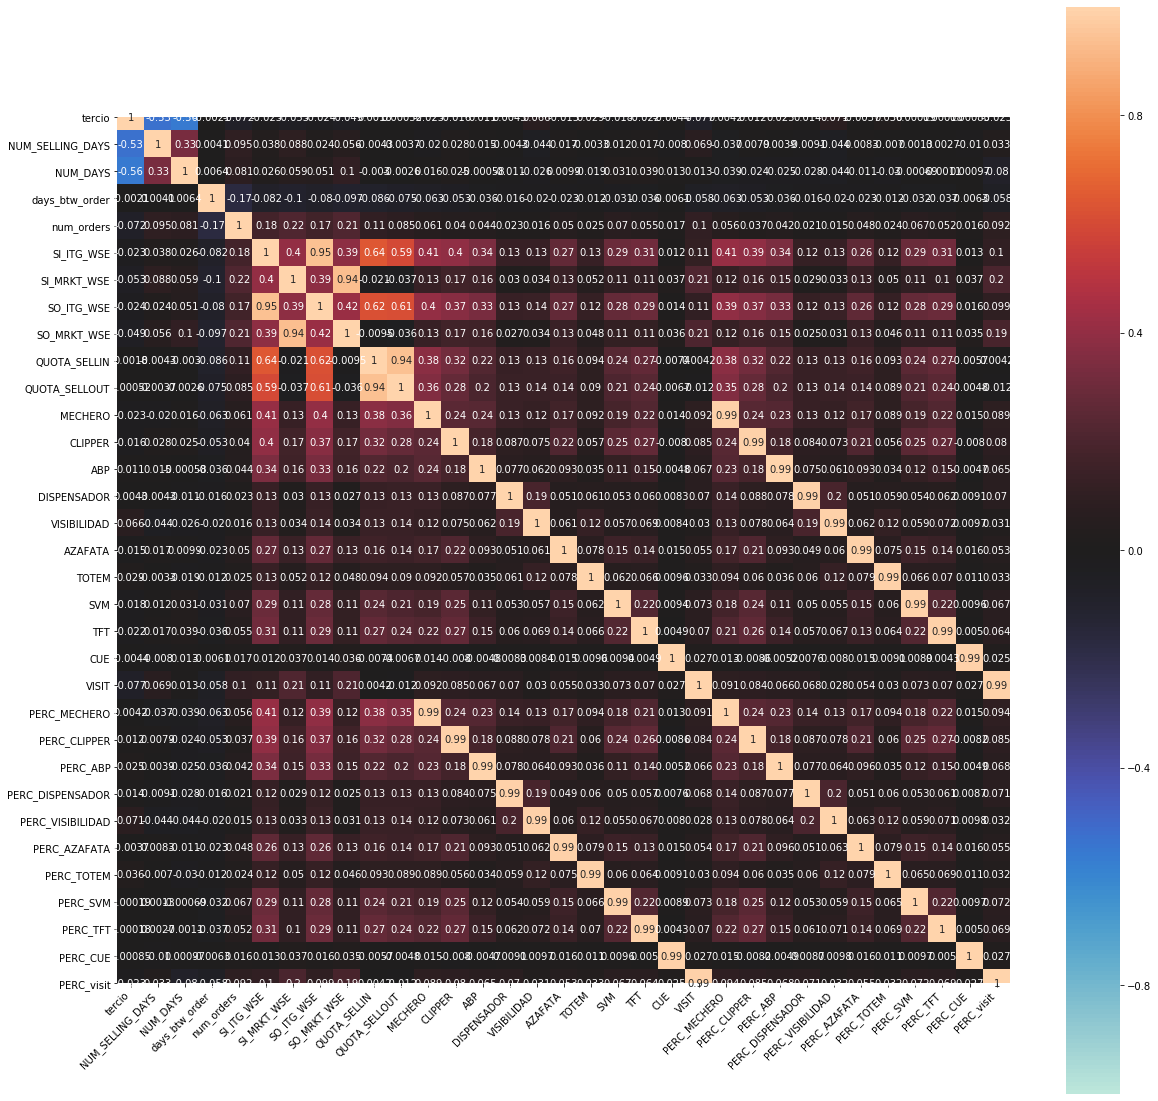

In [17]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corr, annot=True,
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [18]:
Corr_feats = ['QUOTA_SELLOUT']
Corr_feats.extend(feats_to_explore)
corrF=dataset[Corr_feats].corr()

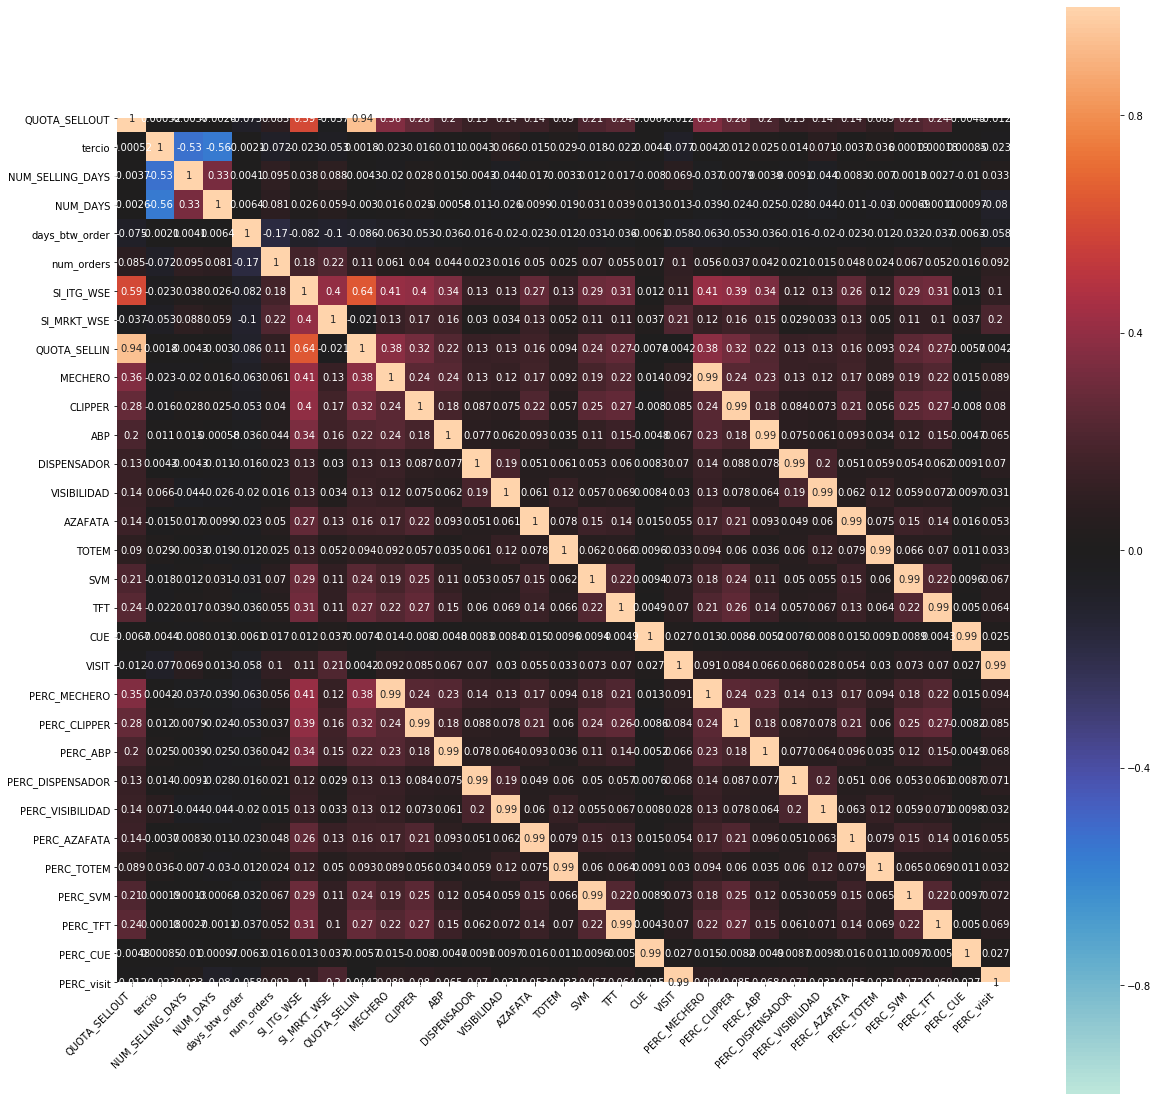

In [19]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corrF, annot=True,
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
feats_to_explore=['tercio', 'NUM_SELLING_DAYS', 'NUM_DAYS', 'days_btw_order', 'num_orders', 'SI_ITG_WSE', 'SI_MRKT_WSE','QUOTA_SELLIN', 'PERC_MECHERO', 'PERC_CLIPPER', 'PERC_ABP', 'PERC_DISPENSADOR', 'PERC_VISIBILIDAD', 'PERC_AZAFATA', 'PERC_TOTEM', 'PERC_SVM', 'PERC_TFT', 'PERC_CUE', 'PERC_visit']

In [21]:
Corr_feats = ['QUOTA_SELLOUT']
Corr_feats.extend(feats_to_explore)
corrF=dataset[Corr_feats].corr()

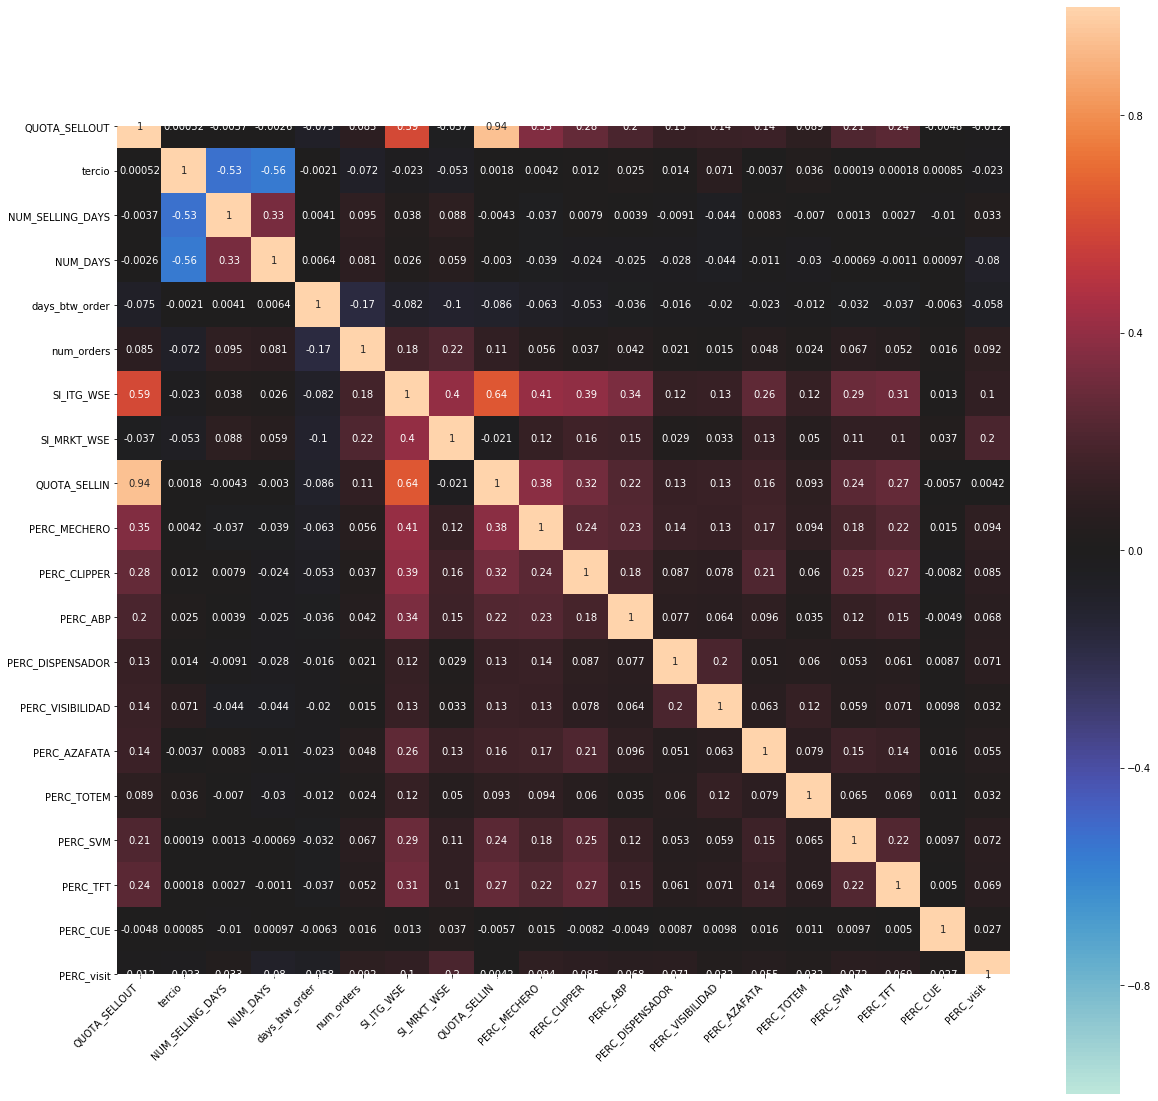

In [22]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corrF, annot=True,
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Outliers

In [23]:
feats_to_explore

['tercio',
 'NUM_SELLING_DAYS',
 'NUM_DAYS',
 'days_btw_order',
 'num_orders',
 'SI_ITG_WSE',
 'SI_MRKT_WSE',
 'QUOTA_SELLIN',
 'PERC_MECHERO',
 'PERC_CLIPPER',
 'PERC_ABP',
 'PERC_DISPENSADOR',
 'PERC_VISIBILIDAD',
 'PERC_AZAFATA',
 'PERC_TOTEM',
 'PERC_SVM',
 'PERC_TFT',
 'PERC_CUE',
 'PERC_visit']

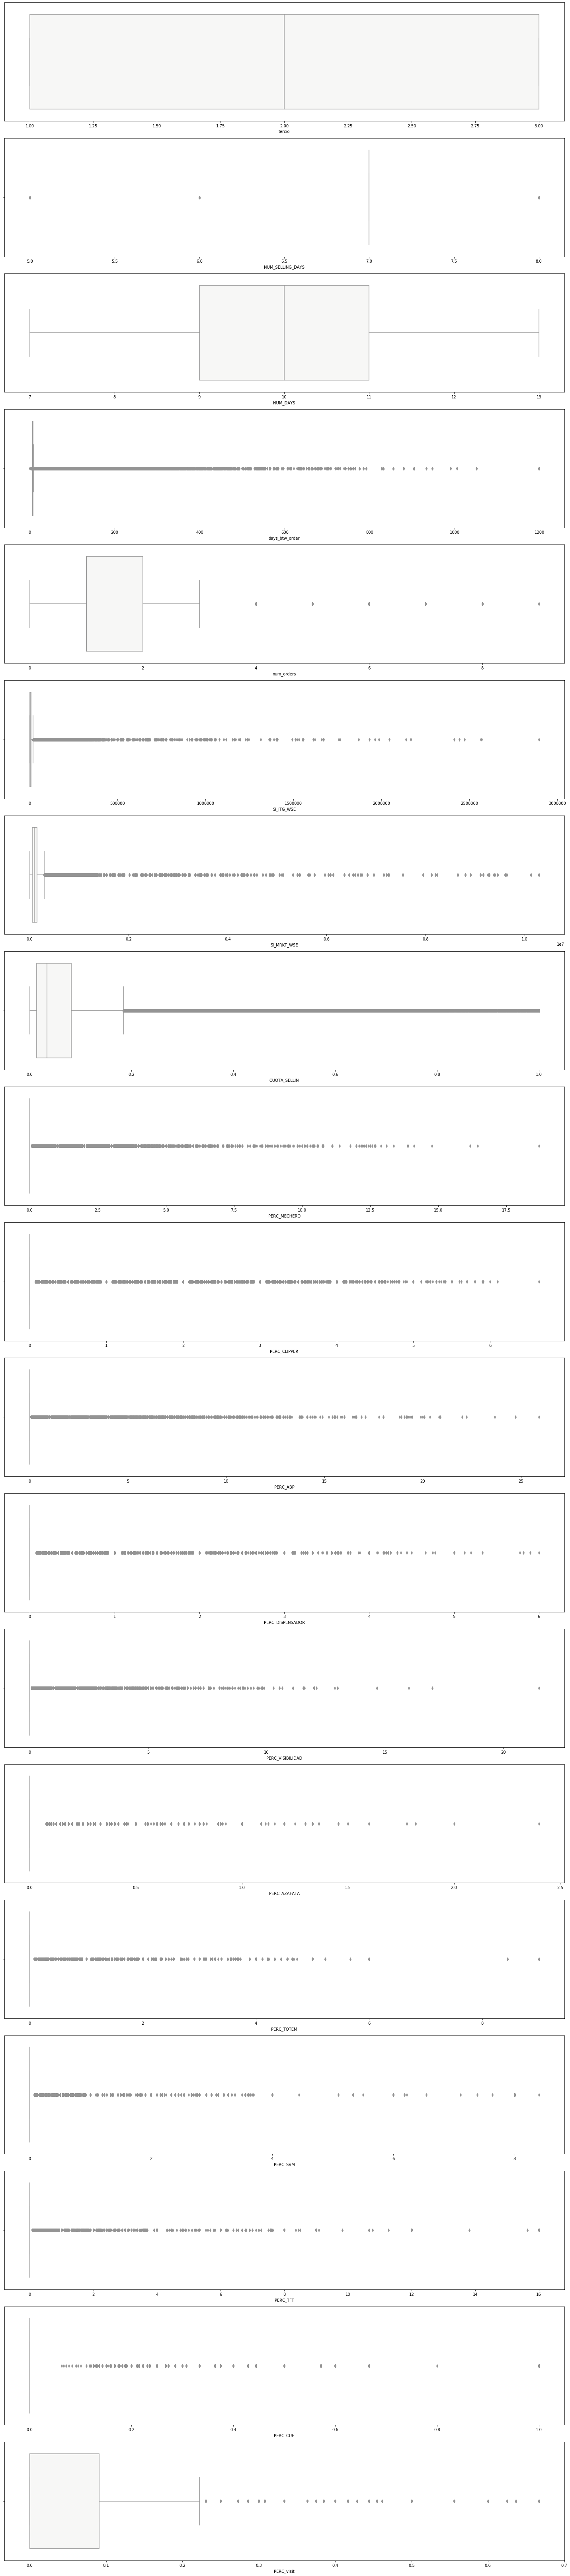

In [24]:
plt.figure(figsize=(20,90))
for i, feature in enumerate(feats_to_explore):
    plt.subplot(19, 1, i+1)
    sns.boxplot(x=feature, data=dataset, palette= "PiYG")

plt.tight_layout()
plt.show()